## 0. Uncertainties on mean and standard deviation

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy
import math

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:26<00:00,  4.84it/s]


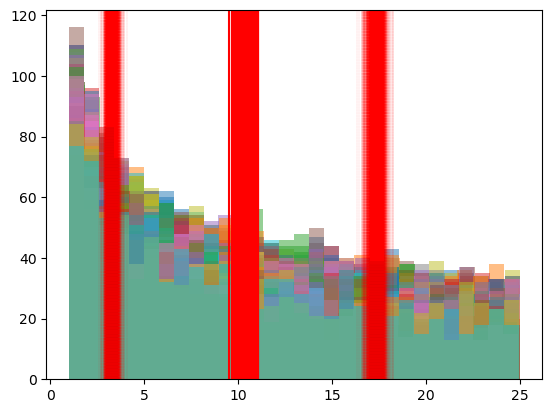

In [2]:
N = 1000         # number of data generated
repetitions = 1000
x_ = []
s = []
for i in tqdm(range(repetitions)):
    x = []
    for j in range(N):
        x.append( np.random.uniform(1,5)**2 )    # distribution from which I get the samples
    plt.hist(x,30,alpha=0.5)

    x_.append( np.mean(x) )     # compute mean from data
    plt.axvline(x_[i],color='r')

    s.append( np.std(x) )    # compute stand dev from data
    plt.axvline(x_[i]+s[i],color='r',linestyle='--', linewidth=0.1)
    plt.axvline(x_[i]-s[i],color='r',linestyle='--', linewidth=0.1)

Error of the mean: THEO 0.22215826389268725  EXP 0.22162834066490872
Error of the std:  THEO 0.15716821866033634  EXP 0.10856622427183782


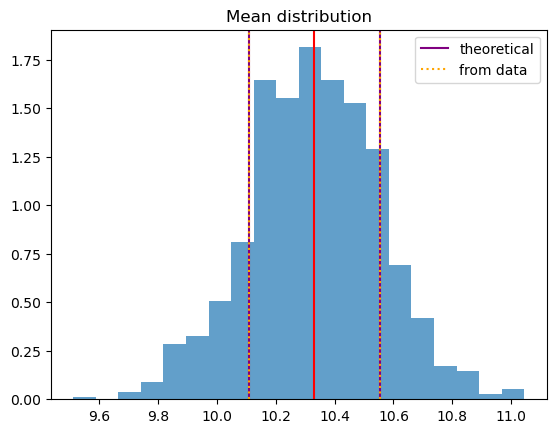

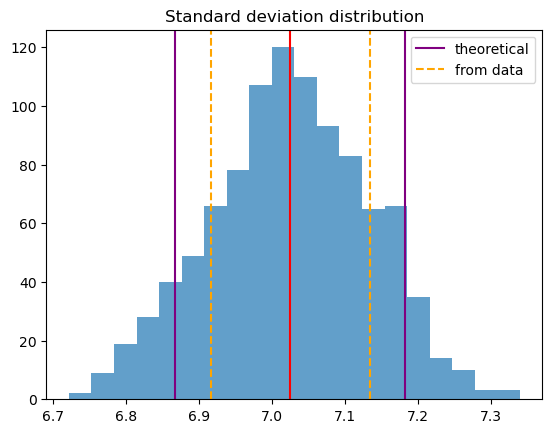

In [12]:
x__mean = np.mean(x_)
x__ds = np.sqrt( np.sum((x_-x__mean)**2)/(len(x_)-1) )  #error of mean from data

s_mean = np.mean(s)
s_ds = np.sqrt( np.sum((s-s_mean)**2)/(len(s)-1) )      # error of standard deviation from data

x__error = s_mean/np.sqrt(len(s))                  # error of mean from formula
s_error = s_mean/np.sqrt(2*(len(s)-1))             # error of s from formula

print("Error of the mean: THEO",x__error," EXP",x__ds)
print("Error of the std:  THEO",s_error," EXP",s_ds)
import scipy
plt.hist(x_,20,alpha=0.7,density=True)
#plt.plot(np.linspace(9,11,200), scipy.stats.norm(x__mean,s_mean/np.sqrt(N)).pdf(np.linspace(9,11,200)))  # Central limit theorem
plt.axvline(x__mean,c='r')
plt.axvline(x__mean+x__error,c='purple',label='theoretical')
plt.axvline(x__mean-x__error,c='purple')
plt.axvline(x__mean+x__ds,c='orange',ls='dotted',label='from data')
plt.axvline(x__mean-x__ds,c='orange',ls='dotted')
plt.legend()
plt.title('Mean distribution')
plt.show()

plt.hist(s,20,alpha=0.7)
plt.axvline(s_mean,c='r')
plt.axvline(s_mean+s_error,c='purple',label='theoretical')
plt.axvline(s_mean-s_error,c='purple')
plt.axvline(s_mean+s_ds,c='orange',ls='dashed',label='from data')
plt.axvline(s_mean-s_ds,c='orange',ls='dashed')
plt.title('Standard deviation distribution')
plt.legend()
plt.show()

## 1. Gaussian integral

$\int_0^\infty x^3 exp\left(-\frac{x^2}{2\sigma^2}\right)\,dx = 2\sigma^4$

162
165.3210906829762


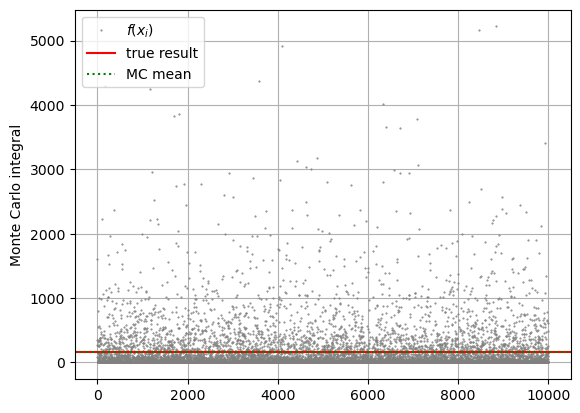

In [96]:
N = 10000
sigma = 3
norm = 2/(np.sqrt(2*np.pi)*sigma)    # normalization factor
result = 2*sigma**4

gauss = scipy.stats.norm(0, sigma)  

samples = gauss.rvs(3*N)          # generate more than N samples
samples = samples[samples>0]      # select only positive
samples = samples[:N]             # take exactly N (positive) samples
x3n = samples**3/norm
MC = np.mean(x3n)

print(result)
print(MC)

# plots
plt.plot(x3n, color='grey',marker='o',markersize=0.5,linewidth=0, label='$f(x_i)$')
plt.axhline(result, color='r', label='true result')
plt.axhline(MC, color='g', ls=':', label='MC mean')
plt.grid()
plt.legend()
plt.ylabel('Monte Carlo integral')
plt.show()

162
162.03483183636155


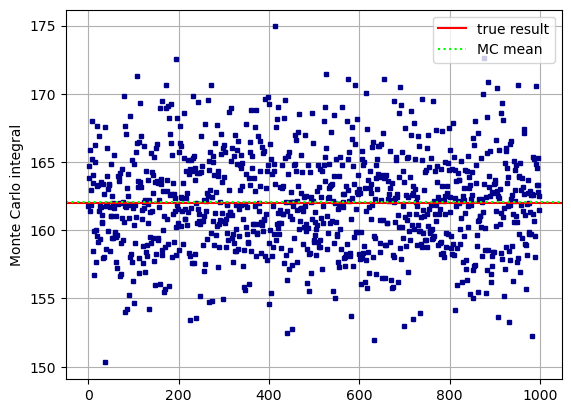

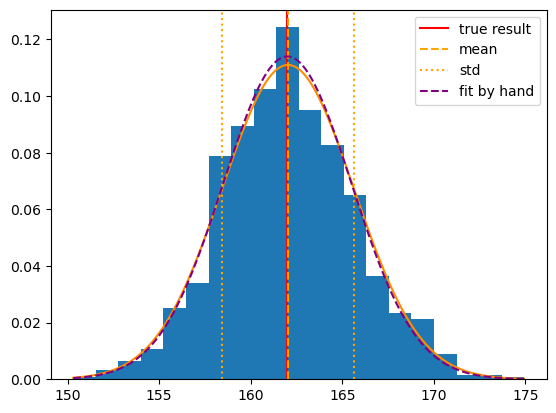

In [97]:
# repetition with N fixed

Nrep = 1000
N = 10000

MC=[]
for i in range(Nrep):
    samples = gauss.rvs(3*N)          # generate more than N samples
    samples = samples[samples>0]      # select only positive
    samples = samples[:N]             # take exactly N (positive) samples
    MC.append(np.mean(samples**3)/norm)

print(result)
print(np.mean(MC))

# plots
plt.plot(MC, color='darkblue',marker='s',markersize=3,linewidth=0)
plt.axhline(result, color='r', label='true result')
plt.axhline(np.mean(MC), color='lime', ls=':', label='MC mean')
plt.grid()
plt.legend()
plt.ylabel('Monte Carlo integral')
plt.show()


plt.hist(MC, bins=20, density=True)
plt.axvline(result, color='r', label='true result')

mu, std = scipy.stats.norm.fit(MC)
xgrid = np.linspace(min(MC), max(MC), 500)
pdf = scipy.stats.norm.pdf(xgrid, mu, std)

plt.plot(xgrid, pdf, color='darkorange')
plt.axvline(mu, color='orange', ls='--', label='mean')
plt.axvline(mu+std, color='orange', ls=':', label='std')
plt.axvline(mu-std, color='orange', ls=':')

mean = result
st_dev = 3.5
def gaussian(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma *np.exp(-(x-mu)**2 /2/sigma**2)
plt.plot(xgrid, gaussian(xgrid, mean, st_dev), c='purple', ls='dashed', label='fit by hand')

plt.legend()
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.61it/s]


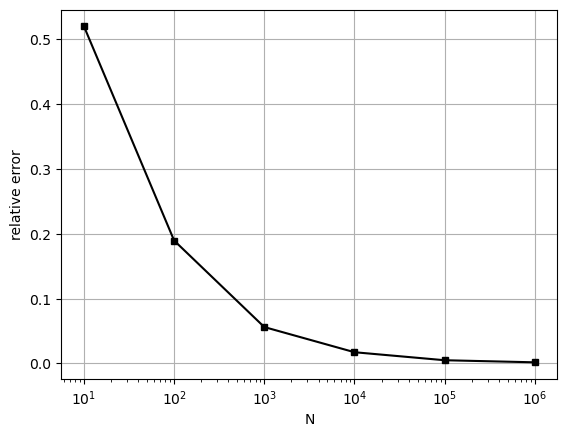

In [137]:
# error function of N

N = [10,100,1000,10000,100000,1000000]
Nrep = 100
sigma = 30
norm = 2/(np.sqrt(2*np.pi)*sigma)    # normalization factor
result = 2*sigma**4
error = []
gauss = scipy.stats.norm(0, sigma)

for n in N:
    MC = np.zeros(Nrep)
    for j in tqdm(range(Nrep)):
        samples = gauss.rvs(3*n)
        samples = samples[samples>0]
        samples = samples[:n]
        MC[j] = np.mean(samples**3)/norm
        
    error.append(np.mean(abs(MC-result)/result))       # compute relative errors and average them

plt.plot(N, error, marker='s',markersize=5,color='k')

plt.xscale('log')
plt.xlabel('N')
plt.ylabel('relative error')
plt.grid()
plt.show()

## 2. Kicking horses

In [140]:
kicks = (0,1,2,3,4)
groups = (109,65,22,3,1)
events = []
for i in range(len(groups)):
    for j in range(groups[i]):
        events.append(kicks[i])
mean = np.mean(events)
print("Mean =",mean)

Mean = 0.61


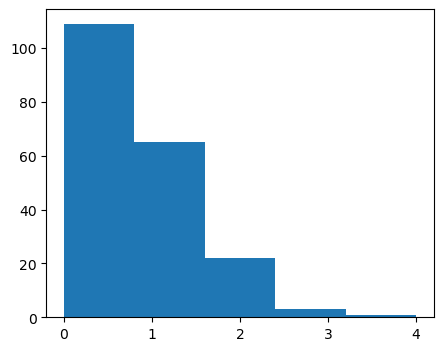

In [171]:
plt.figure(figsize=(5,4))
plt.hist(events, len(kicks))
plt.xticks(np.arange(5),np.arange(5))
plt.show()

In [172]:
freq_norm = []
for i in range(len(groups)):
    freq_norm.append(groups[i]/200)               # probability from data

def Poisson(mu, k):
    return mu**k *np.exp(-mu)/math.factorial(k)
    
prob = []
for i in range(len(kicks)):
    prob.append(round(Poisson(mean,kicks[i]), 3))   # fit with Poisson distribution
print(freq_norm)
print(prob)

[0.545, 0.325, 0.11, 0.015, 0.005]
[0.543, 0.331, 0.101, 0.021, 0.003]


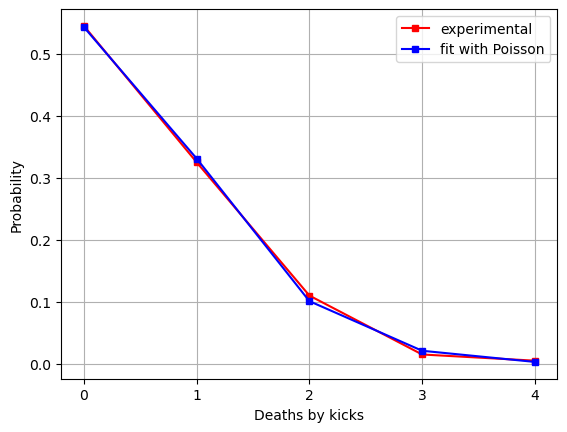

In [173]:
plt.plot(kicks,freq_norm,'s-',color='r', markersize=5,label='experimental')
plt.plot(kicks,prob,'s-', color='b', markersize=5,label='fit with Poisson')
plt.grid()
plt.xlabel('Deaths by kicks')
plt.ylabel('Probability')
plt.legend()
plt.xticks(np.arange(5),np.arange(5))
plt.show()

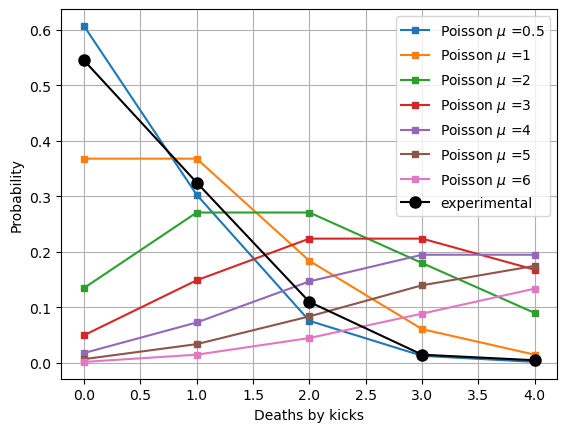

In [181]:
mu = [0.5,1,2,3,4,5,6]     # try different values of mu

for mean in mu:
    freq_norm = []
    for i in range(len(groups)):
        freq_norm.append(groups[i]/200)               # probability from data

    def Poisson(mu, k):
        return mu**k *np.exp(-mu)/math.factorial(k)

    prob = []
    for i in range(len(kicks)):
        prob.append(round(Poisson(mean,kicks[i]), 3))   # fit with Poisson distribution

    plt.plot(kicks,prob,'s-', markersize=5,label='Poisson $\mu$ ='+str(mean))

plt.plot(kicks,freq_norm,'o-',color='k', markersize=8,label='experimental')
plt.grid()
plt.xlabel('Deaths by kicks')
plt.ylabel('Probability')
plt.legend()
plt.show()